<a href="https://colab.research.google.com/github/garryed/QCS-Final-Project/blob/main/QCS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pennylane

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.2 MB/s eta 0:00:00


# **Effect of bit flip noise channel on n-bit input string**

In [ ]:
import pennylane as qml
import numpy as np

# Use the default.mixed device for noise support
n_bits = 4  # Number of bits in the input string
dev = qml.device("default.mixed", wires=n_bits, shots=1)

@qml.qnode(dev)
def noisy_circuit(input_bits, noise_prob):
    # Encode the input bits as the initial state of the qubits
    for i in range(n_bits):
        if input_bits[i] == '1':
            qml.PauliX(wires=i)  # Apply X gate to set qubit to |1> if input bit is 1

    # Apply noise to each qubit
    for i in range(n_bits):
        qml.BitFlip(noise_prob, wires=i)  # Applying Bit Flip noise with a given probability

    # Measure the qubits in the computational basis
    return qml.sample(wires=range(n_bits))

# Define a function to run the circuit and get the output string
def get_noisy_output(input_bits, noise_prob=0.1):
    # Run the circuit
    result = noisy_circuit(input_bits, noise_prob)
    # Convert the result to a binary string
    output_bits = ''.join(str(int(bit)) for bit in result)
    return output_bits

# Example usage
input_bits = "1010"  # Input n-bit string
noise_prob = 0.4     # Probability of bit-flip noise
output_bits = get_noisy_output(input_bits, noise_prob)

print(f"Input bits: {input_bits}")
print(f"Output bits after noise: {output_bits}")


Input bits: 1010
Output bits after noise: 0110


# **Probabilities of the output string after n runs**


In [ ]:
import pennylane as qml
import numpy as np

# Use the default.mixed device for noise support
n_bits = 4  # Number of bits in the input string
dev = qml.device("default.mixed", wires=n_bits, shots=1000)  # Set shots here

@qml.qnode(dev)
def noisy_circuit(input_bits, noise_prob):
    # Encode the input bits as the initial state of the qubits
    for i in range(n_bits):
        if input_bits[i] == '1':
            qml.PauliX(wires=i)  # Apply X gate to set qubit to |1> if input bit is 1

    # Apply noise to each qubit
    for i in range(n_bits):
        qml.BitFlip(noise_prob, wires=i)  # Applying Bit Flip noise with a given probability

    # Measure the qubits in the computational basis
    return qml.sample(wires=range(n_bits))

# Define a function to get the probability distribution of the output
def get_output_probabilities(input_bits, noise_prob=0.1):
    # Run the circuit with multiple shots
    results = noisy_circuit(input_bits, noise_prob)
    # Convert results to binary strings
    binary_results = [''.join(str(int(bit)) for bit in sample) for sample in results]

    # Calculate the frequency of each output
    unique, counts = np.unique(binary_results, return_counts=True)
    total_shots = len(results)
    probabilities = {bit: count / total_shots for bit, count in zip(unique, counts)}
    return probabilities

# Example usage
input_bits = "1010"  # Input n-bit string
noise_prob = 0.7     # Probability of bit-flip noise
probabilities = get_output_probabilities(input_bits=input_bits, noise_prob=noise_prob)

print(f"Input bits: {input_bits}")
print(f"Output probabilities: {probabilities}")


Input bits: 1010
Output probabilities: {'0000': 0.041, '0001': 0.1, '0010': 0.021, '0011': 0.039, '0100': 0.113, '0101': 0.226, '0110': 0.043, '0111': 0.121, '1000': 0.015, '1001': 0.05, '1010': 0.012, '1011': 0.02, '1100': 0.046, '1101': 0.093, '1110': 0.014, '1111': 0.046}


# **Plotting Probability distribution**


Input bits: 1010
Output probabilities: {'0000': 0.051, '0001': 0.055, '0010': 0.068, '0011': 0.06, '0100': 0.067, '0101': 0.054, '0110': 0.079, '0111': 0.078, '1000': 0.057, '1001': 0.056, '1010': 0.058, '1011': 0.056, '1100': 0.068, '1101': 0.073, '1110': 0.04, '1111': 0.08}


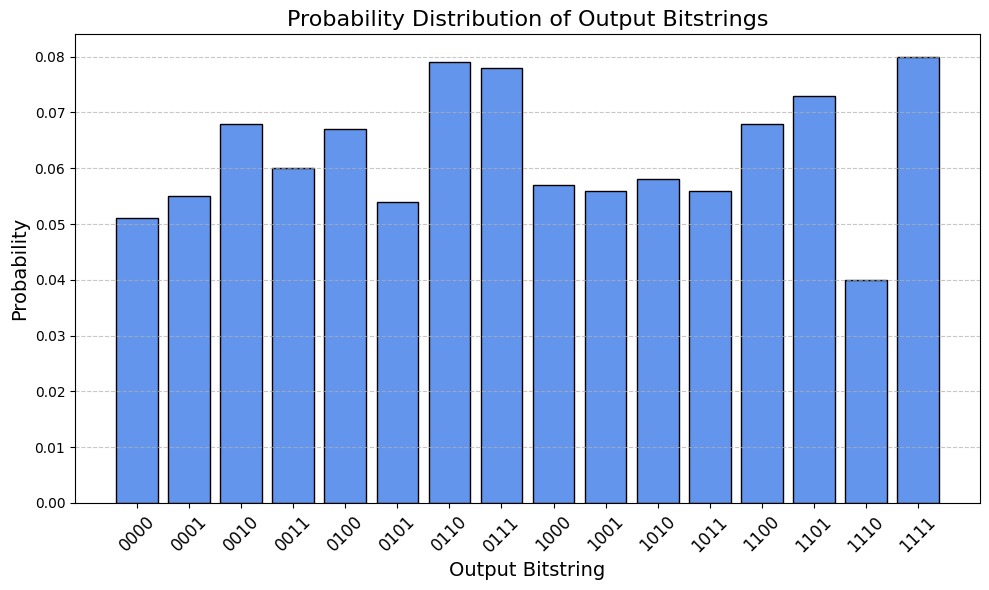

In [ ]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

# Use the default.mixed device for noise support
n_bits = 4  # Number of bits in the input string
dev = qml.device("default.mixed", wires=n_bits, shots=1000)  # Set shots here

@qml.qnode(dev)
def noisy_circuit(input_bits, noise_prob):
    # Encode the input bits as the initial state of the qubits
    for i in range(n_bits):
        if input_bits[i] == '1':
            qml.PauliX(wires=i)  # Apply X gate to set qubit to |1> if input bit is 1

    # Apply noise to each qubit
    for i in range(n_bits):
        qml.BitFlip(noise_prob, wires=i)  # Applying Bit Flip noise with a given probability

    # Measure the qubits in the computational basis
    return qml.sample(wires=range(n_bits))

# Define a function to get the probability distribution of the output
def get_output_probabilities(input_bits, noise_prob=0.1):
    # Run the circuit with multiple shots
    results = noisy_circuit(input_bits, noise_prob)
    # Convert results to binary strings
    binary_results = [''.join(str(int(bit)) for bit in sample) for sample in results]

    # Calculate the frequency of each output
    unique, counts = np.unique(binary_results, return_counts=True)
    total_shots = len(results)
    probabilities = {bit: count / total_shots for bit, count in zip(unique, counts)}
    return probabilities

# Plot the probability distribution
def plot_probability_distribution(probabilities):
    # Extract keys (bitstrings) and values (probabilities)
    bitstrings = list(probabilities.keys())
    probability_values = list(probabilities.values())

    # Plot the graph
    plt.figure(figsize=(10, 6))
    plt.bar(bitstrings, probability_values, color='cornflowerblue', edgecolor='black')
    plt.title('Probability Distribution of Output Bitstrings', fontsize=16)
    plt.xlabel('Output Bitstring', fontsize=14)
    plt.ylabel('Probability', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example usage
input_bits = "1010"  # Input n-bit string
noise_prob = 0.5     # Probability of bit-flip noise
probabilities = get_output_probabilities(input_bits, noise_prob)

print(f"Input bits: {input_bits}")
print(f"Output probabilities: {probabilities}")

# Plot the probabilities
plot_probability_distribution(probabilities)


# **Mean Frequency distribution**

Input bits: 1010
Mean frequencies for each output bitstring (over 10 runs): {'0000': 56.8, '0001': 36.9, '0010': 85.8, '0011': 62.6, '0100': 37.3, '0101': 23.6, '0110': 55.4, '0111': 38.7, '1000': 89.0, '1001': 58.5, '1010': 124.0, '1011': 86.8, '1100': 60.7, '1101': 40.9, '1110': 85.3, '1111': 57.7}


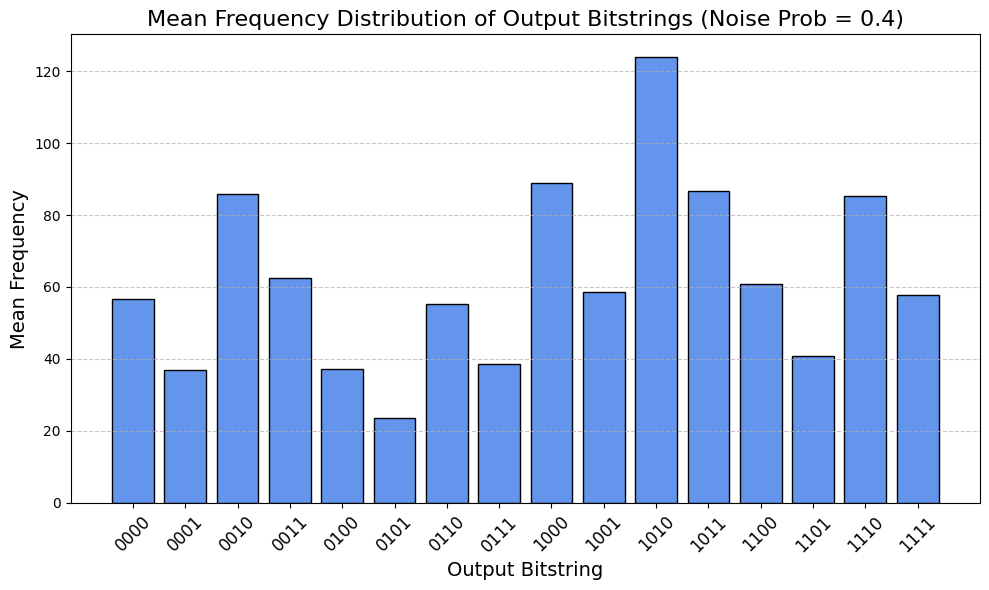

In [ ]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Use the default.mixed device for noise support
n_bits = 4  # Number of bits in the input string
dev = qml.device("default.mixed", wires=n_bits, shots=1000)  # Set shots here

@qml.qnode(dev)
def noisy_circuit(input_bits, noise_prob):
    # Encode the input bits as the initial state of the qubits
    for i in range(n_bits):
        if input_bits[i] == '1':
            qml.PauliX(wires=i)  # Apply X gate to set qubit to |1> if input bit is 1

    # Apply noise to each qubit
    for i in range(n_bits):
        qml.BitFlip(noise_prob, wires=i)  # Applying Bit Flip noise with a given probability

    # Measure the qubits in the computational basis
    return qml.sample(wires=range(n_bits))

# Function to get frequency distribution of the output
def get_frequency_distribution(input_bits, noise_prob=0.1):
    results = noisy_circuit(input_bits, noise_prob)
    binary_results = [''.join(str(int(bit)) for bit in sample) for sample in results]

    unique, counts = np.unique(binary_results, return_counts=True)
    frequencies = {bit: count for bit, count in zip(unique, counts)}
    return frequencies

# Function to calculate mean frequency distribution over n runs
def get_mean_frequencies(input_bits, noise_prob, n_runs=10):
    aggregate_frequencies = defaultdict(list)

    # Run the circuit n times to calculate mean frequencies
    for _ in range(n_runs):
        frequencies = get_frequency_distribution(input_bits, noise_prob)

        # Record frequencies for each bitstring
        for bitstring in frequencies:
            aggregate_frequencies[bitstring].append(frequencies[bitstring])

    # Calculate the mean frequency for each bitstring
    mean_frequencies = {bitstring: np.mean(counts) for bitstring, counts in aggregate_frequencies.items()}
    return mean_frequencies

# Plot the mean frequency distribution
def plot_mean_frequency_distribution(mean_frequencies, noise_prob):
    bitstrings = list(mean_frequencies.keys())
    mean_values = list(mean_frequencies.values())

    plt.figure(figsize=(10, 6))
    plt.bar(bitstrings, mean_values, color='cornflowerblue', edgecolor='black')
    plt.title(f'Mean Frequency Distribution of Output Bitstrings (Noise Prob = {noise_prob})', fontsize=16)
    plt.xlabel('Output Bitstring', fontsize=14)
    plt.ylabel('Mean Frequency', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example usage
input_bits = "1010"  # Input n-bit string
noise_prob = 0.4     # Probability of bit-flip noise
n_runs = 10          # Number of runs for averaging

mean_frequencies = get_mean_frequencies(input_bits, noise_prob, n_runs)

print(f"Input bits: {input_bits}")
print(f"Mean frequencies for each output bitstring (over {n_runs} runs): {mean_frequencies}")

# Plot the mean frequency distribution
plot_mean_frequency_distribution(mean_frequencies, noise_prob)


## **Code for Bit Flip for 4- Qubit string across multiple noise probabilities**

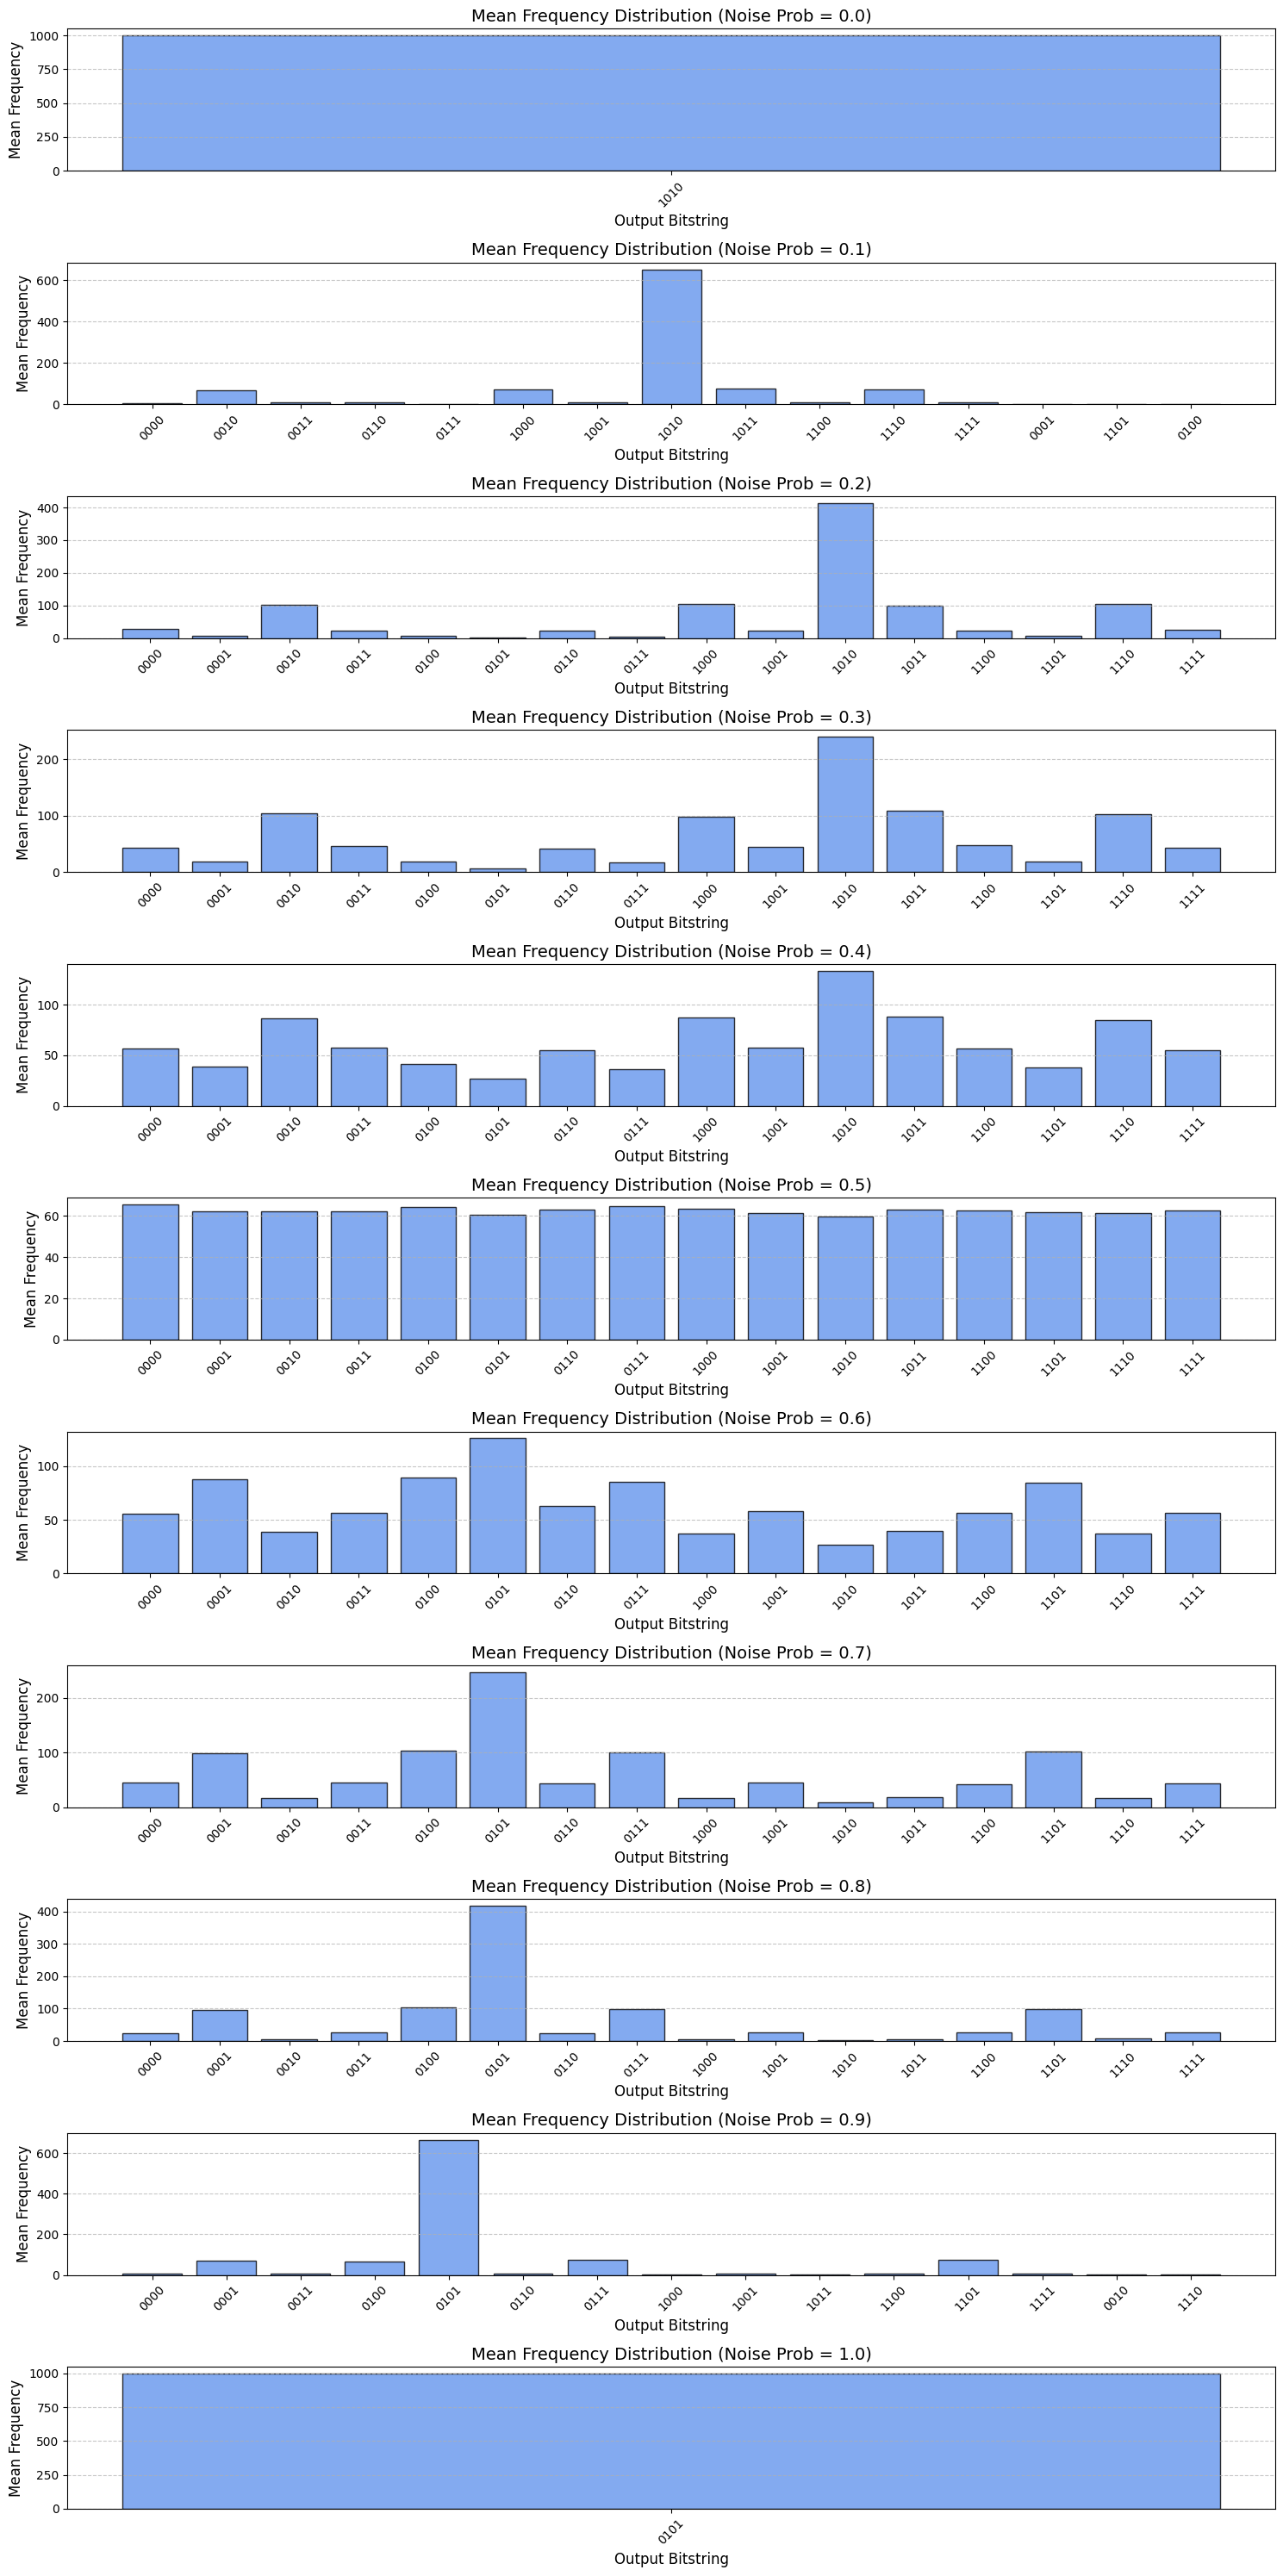

In [ ]:
# Required libraries

import pennylane as qml

import numpy as np

import matplotlib.pyplot as plt

from collections import defaultdict



# Device setup

n_bits = 4

dev = qml.device("default.mixed", wires=n_bits, shots=1000)



# Define the quantum circuit with noise

@qml.qnode(dev)

def noisy_circuit(input_bits, noise_prob):

    for i in range(n_bits):

        if input_bits[i] == '1':

            qml.PauliX(wires=i)

    for i in range(n_bits):

        qml.BitFlip(noise_prob, wires=i)

    return qml.sample(wires=range(n_bits))



# Function to get frequency distribution

def get_frequency_distribution(input_bits, noise_prob=0.1):

    results = noisy_circuit(input_bits, noise_prob)

    binary_results = [''.join(str(int(bit)) for bit in sample) for sample in results]

    unique, counts = np.unique(binary_results, return_counts=True)

    frequencies = {bit: count for bit, count in zip(unique, counts)}

    return frequencies



# Function to calculate mean frequency distribution over n runs

def get_mean_frequencies(input_bits, noise_prob, n_runs=10):

    aggregate_frequencies = defaultdict(list)

    for _ in range(n_runs):

        frequencies = get_frequency_distribution(input_bits, noise_prob)

        for bitstring in frequencies:

            aggregate_frequencies[bitstring].append(frequencies[bitstring])

    mean_frequencies = {bitstring: np.mean(counts) for bitstring, counts in aggregate_frequencies.items()}

    return mean_frequencies



# Define input and noise probabilities

input_bits = "1010"

noise_probs = np.arange(0, 1.1, 0.1)  # From 0.1 to 1.0 in steps of 0.1

n_runs = 10



# Collect mean frequencies for all noise probabilities

all_mean_frequencies = []

for noise_prob in noise_probs:

    mean_frequencies = get_mean_frequencies(input_bits, noise_prob, n_runs)

    all_mean_frequencies.append((noise_prob, mean_frequencies))



# Plot each noise probability result on a separate graph

plt.figure(figsize=(15, 30))



for idx, (noise_prob, mean_frequencies) in enumerate(all_mean_frequencies, start=1):

    plt.subplot(len(all_mean_frequencies), 1, idx)  # Create a subplot for each noise probability

    bitstrings = list(mean_frequencies.keys())

    mean_values = list(mean_frequencies.values())

    plt.bar(

        bitstrings, mean_values, color='cornflowerblue', edgecolor='black', alpha=0.8

    )

    plt.title(f'Mean Frequency Distribution (Noise Prob = {noise_prob:.1f})', fontsize=14)

    plt.xlabel('Output Bitstring', fontsize=12)

    plt.ylabel('Mean Frequency', fontsize=12)

    plt.xticks(rotation=45, fontsize=10)

    plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()

plt.show()

# **Normalised Probability Distribution**

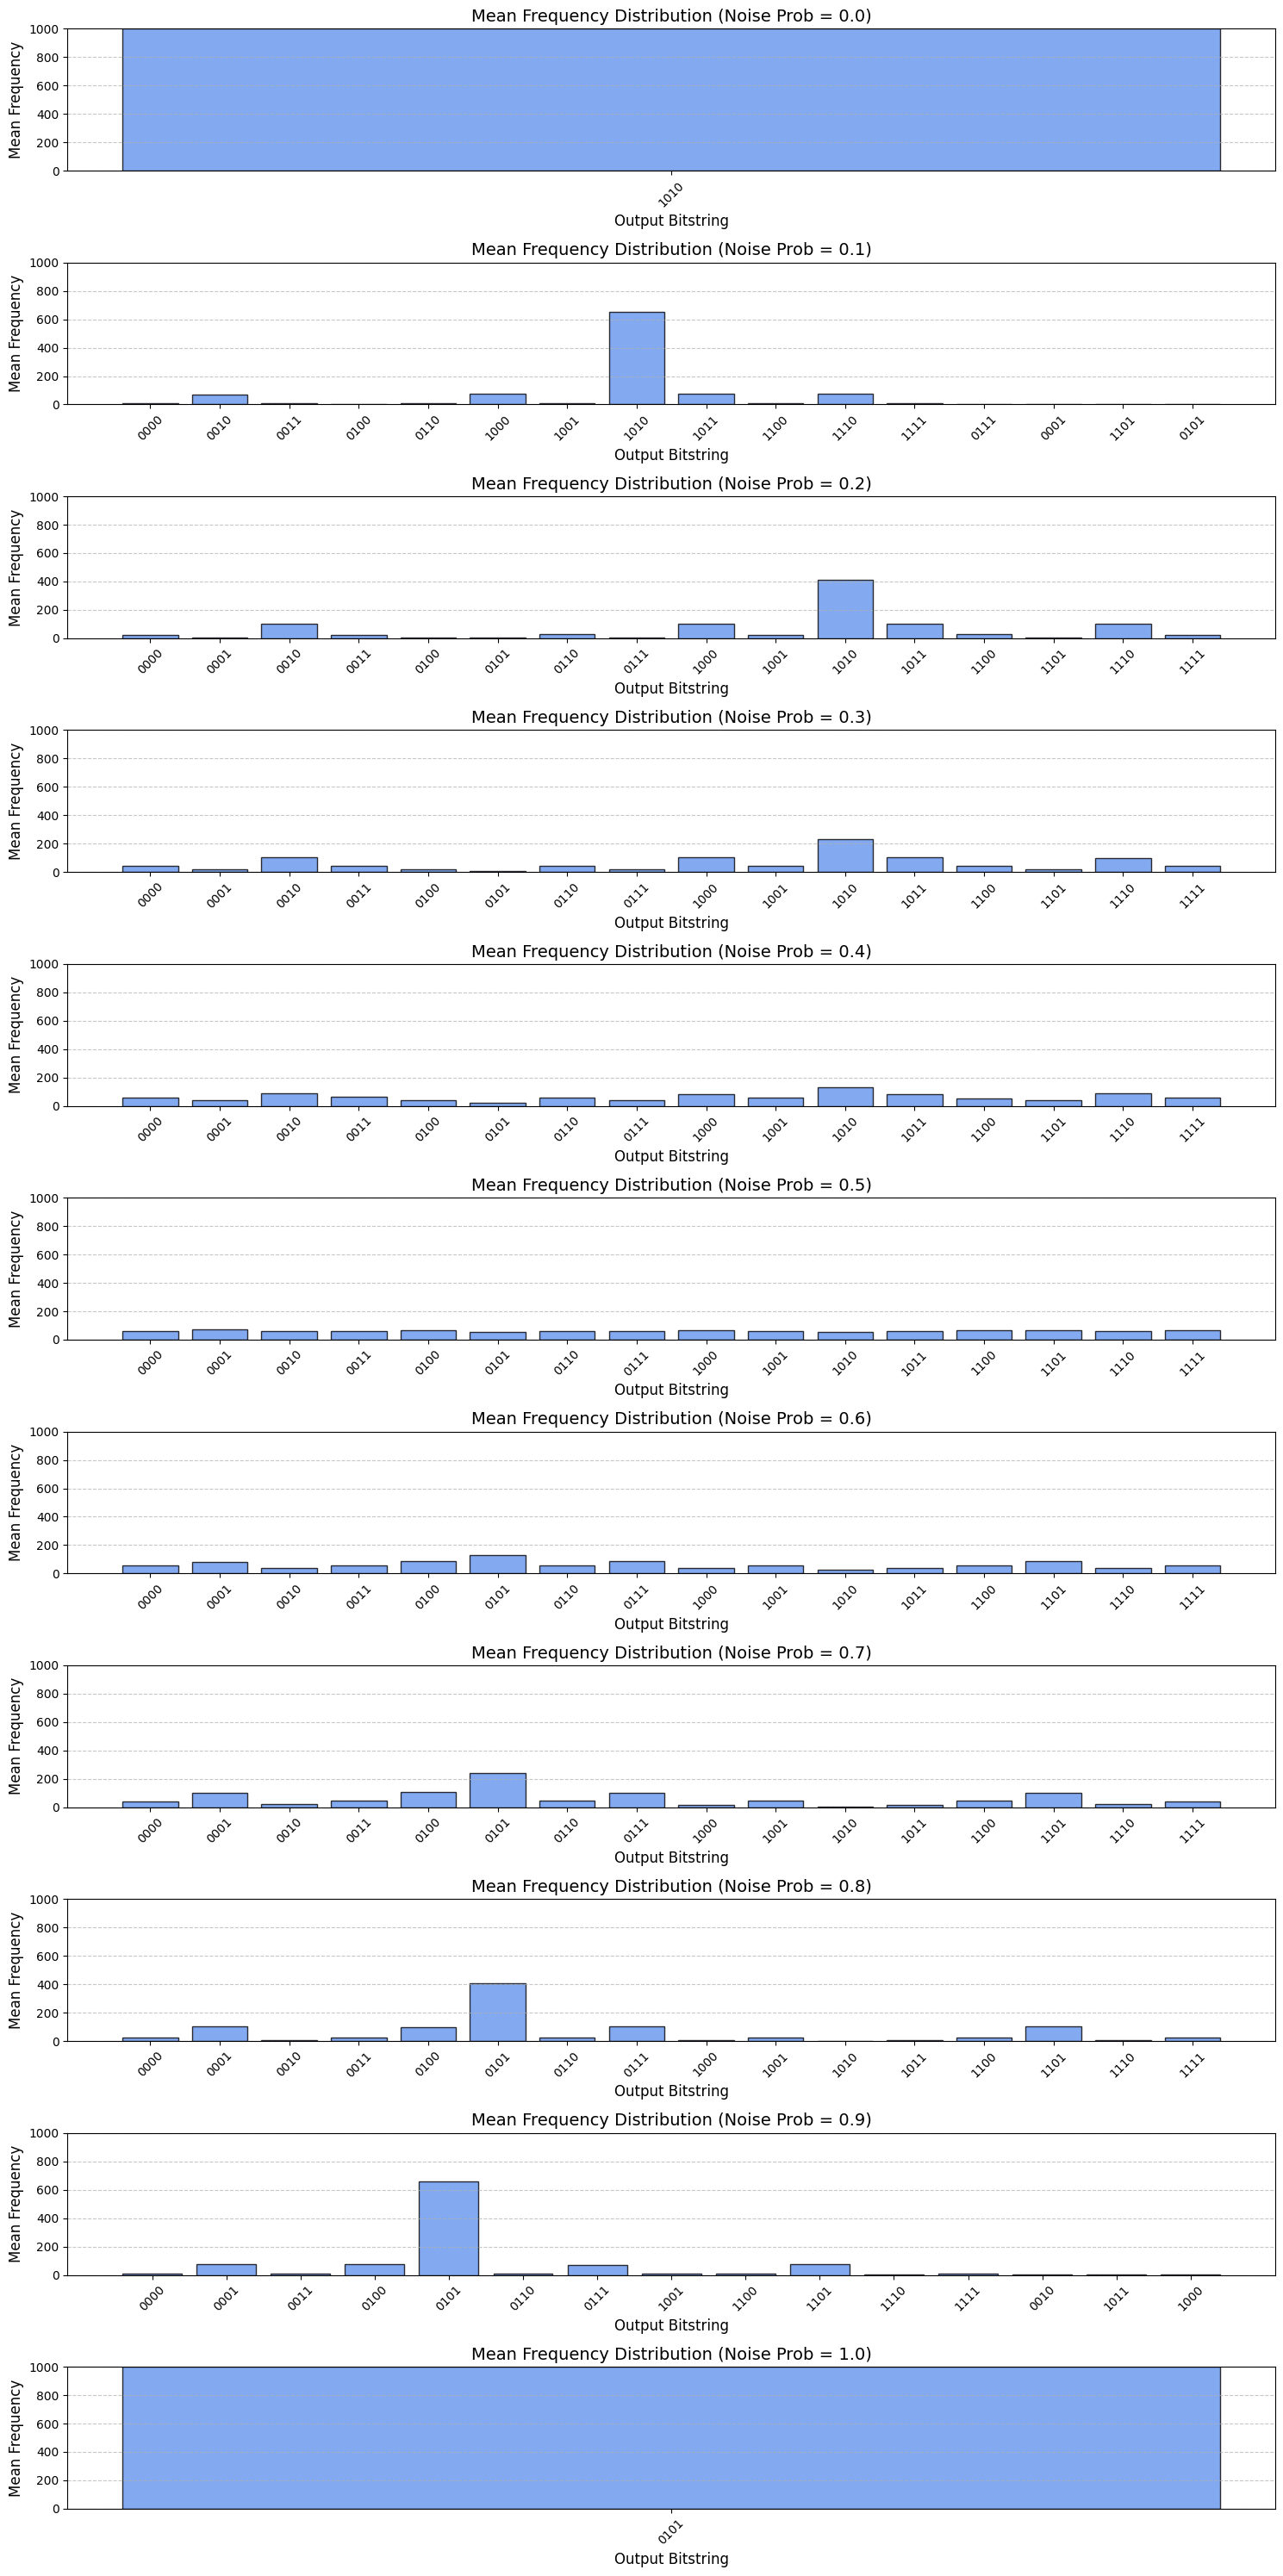

In [ ]:
# Required libraries
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Device setup
n_bits = 4
dev = qml.device("default.mixed", wires=n_bits, shots=1000)

# Define the quantum circuit with noise
@qml.qnode(dev)
def noisy_circuit(input_bits, noise_prob):
    for i in range(n_bits):
        if input_bits[i] == '1':
            qml.PauliX(wires=i)

    for i in range(n_bits):
        qml.BitFlip(noise_prob, wires=i)

    return qml.sample(wires=range(n_bits))

# Function to get frequency distribution
def get_frequency_distribution(input_bits, noise_prob=0.1):
    results = noisy_circuit(input_bits, noise_prob)
    binary_results = [''.join(str(int(bit)) for bit in sample) for sample in results]
    unique, counts = np.unique(binary_results, return_counts=True)
    frequencies = {bit: count for bit, count in zip(unique, counts)}
    return frequencies

# Function to calculate mean frequency distribution over n runs
def get_mean_frequencies(input_bits, noise_prob, n_runs=10):
    aggregate_frequencies = defaultdict(list)

    for _ in range(n_runs):
        frequencies = get_frequency_distribution(input_bits, noise_prob)
        for bitstring in frequencies:
            aggregate_frequencies[bitstring].append(frequencies[bitstring])

    mean_frequencies = {bitstring: np.mean(counts) for bitstring, counts in aggregate_frequencies.items()}
    return mean_frequencies

# Define input and noise probabilities
input_bits = "1010"
noise_probs = np.arange(0, 1.1, 0.1)  # From 0.1 to 1.0 in steps of 0.1
n_runs = 10

# Collect mean frequencies for all noise probabilities
all_mean_frequencies = []

for noise_prob in noise_probs:
    mean_frequencies = get_mean_frequencies(input_bits, noise_prob, n_runs)
    all_mean_frequencies.append((noise_prob, mean_frequencies))

# Find the global maximum frequency across all distributions
max_frequency = max(max(mean_frequencies.values()) for _, mean_frequencies in all_mean_frequencies)

# Plot each noise probability result on a separate graph
plt.figure(figsize=(15, 30))

for idx, (noise_prob, mean_frequencies) in enumerate(all_mean_frequencies, start=1):
    plt.subplot(len(all_mean_frequencies), 1, idx)  # Create a subplot for each noise probability
    bitstrings = list(mean_frequencies.keys())
    mean_values = list(mean_frequencies.values())

    plt.bar(
        bitstrings, mean_values, color='cornflowerblue', edgecolor='black', alpha=0.8
    )
    plt.title(f'Mean Frequency Distribution (Noise Prob = {noise_prob:.1f})', fontsize=14)
    plt.xlabel('Output Bitstring', fontsize=12)
    plt.ylabel('Mean Frequency', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Normalize the y-axis to have the same max frequency across all plots
    plt.ylim(0, max_frequency)

plt.tight_layout()
plt.show()


# **Encoding and Decoding for Error Correction**

In [ ]:
import pennylane as qml
import numpy as np
from collections import Counter

# Use the default.mixed device for noise support
dev = qml.device("default.mixed", wires=9, shots=1)

@qml.qnode(dev)
def repetition_code_circuit(input_string, noise_prob):
    # Encode the input string using 3-bit repetition code
    for i, bit in enumerate(input_string):
        if bit == '1':
            qml.PauliX(wires=3 * i)  # First qubit of the triplet
            qml.PauliX(wires=3 * i + 1)  # Second qubit of the triplet
            qml.PauliX(wires=3 * i + 2)  # Third qubit of the triplet

    # Apply bit-flip noise to all qubits
    for i in range(9):  # 9 qubits for 3 bits encoded with repetition code
        qml.BitFlip(noise_prob, wires=i)

    # Measure all qubits in the computational basis
    return qml.sample(wires=range(9))

# Function to decode each bit using majority voting
def decode_repetition_code(received_bits):
    decoded_bits = []
    # Process each group of 3 qubits
    for i in range(0, len(received_bits), 3):
        triplet = list(received_bits[i:i + 3])
        counts = Counter(triplet)
        # Majority voting: return the most common bit
        decoded_bit = max(counts, key=counts.get)
        decoded_bits.append(decoded_bit)
    return ''.join(map(str, decoded_bits))

# Simulate the parity check encoding process for a 3-bit input string
def simulate_repetition_code(input_string, noise_prob):
    # Run the circuit to simulate the noisy transmission
    results = repetition_code_circuit(input_string, noise_prob)

    # Decode the noisy results
    decoded_string = decode_repetition_code(results)

    return results, decoded_string

# Example usage
input_string = "101"  # Input bit string (3 bits)
noise_prob = 0.2  # Probability of bit-flip noise

# Perform the simulation
received_bits, decoded_string = simulate_repetition_code(input_string, noise_prob)

print(f"Input string: {input_string}")
print(f"Received noisy bits: {received_bits}")
print(f"Decoded string (after error correction): {decoded_string}")

Input string: 101
Received noisy bits: [1 0 1 1 0 0 1 1 0]
Decoded string (after error correction): 101
